## HUMAN STATS DISTRIBUTION
- Plots the distribution of spatial information and ANOVA F-statistics for human place cells
- Example Cells

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from convnwb.io import get_files, load_jsons_to_df
from scipy.stats import binom_test

from spiketools.plts.utils import make_grid, get_grid_subplot, save_figure
from spiketools.utils.run import create_methods_list

In [2]:
import seaborn as sns
sns.set_context('talk', font_scale=0.9)

In [3]:

import sys
sys.path.append('../code')
from plts import plot_raster_with_tuning_curve
from pldm_settings import PLOT_PARAMS
sys.path.append('../scripts')
from settings import PATHS, METHODS


In [4]:
results_folder = PATHS['RESULTS'] / 'units'
reports_folder = PATHS['REPORTS'] / 'units'


In [5]:
# Get the list of files
res_files = get_files(results_folder, select='mat')

In [6]:
# Collect all unit results together into a dataframe
all_results = load_jsons_to_df(res_files, folder=results_folder)

In [7]:
# Check the columns
all_results.columns

Index(['unit_ind', 'session_id', 'label', 'spike_name', 'place_bins',
       'spike_position', 'trial_changes', 'trial_Num', 'trial_place_bins',
       'place_sem', 'trial_fr', 'fr_bins', 'fr_sem', 's_bins', 'place_info',
       'place_fr_info', 'place_anova', 'place_fr_anova',
       'place_anova_surr_p_val', 'place_anova_surr_z_score',
       'place_info_surr_p_val', 'place_info_surr_z_score',
       'place_fr_anova_surr_p_val', 'place_fr_anova_surr_z_score',
       'place_fr_info_surr_p_val', 'place_fr_info_surr_z_score'],
      dtype='object')

## Dropped Neurons 

In [8]:
from copy import deepcopy
all_results['firing_rate'] = all_results['place_bins'].apply(lambda x: np.mean(x))

all_results = deepcopy(all_results)

all_results = all_results[all_results['firing_rate'].astype(float) < 20]
all_results = all_results[all_results['firing_rate'].astype(float) > .1]


## Check Results 

In [9]:
# Get total number of units
n_units = len(all_results)
print('Total number of cells: {}'.format(n_units))

Total number of cells: 298


In [10]:
analyses = create_methods_list(METHODS)
# Statistics settings
alpha_level = 0.05
binom_sidedness = 'greater'    # 'two-sided', 'greater', 'less'

In [11]:
#results_folder = PATHS['RESULTS'] / 'units_matlab'

In [12]:

#     print(all_results[f'{analysis}_surr_p_val'])
   # Collect numbers of significant cells
results = {}
for analysis in analyses:
    all_results[f'is_{analysis}'] = (all_results[f'{analysis}_surr_p_val'] < alpha_level).values #results[analysis] = sum(all_results['is_' + analysis])

In [13]:
for analysis in analyses:
     results[analysis] = sum(all_results['is_' + analysis])

In [14]:
# Compute significance of the counts of detected neurons
stats = {}
for analysis in analyses:
    stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)

/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_18162/2198180662.py:4: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)


In [15]:
# Check the number & percent of significant cells per analysis
print('total cells: {}\n'.format( n_units))
for analysis in analyses:
    print('# {} cells:     \t\t{:3d}  ({:5.2f}%) \t\t {:.4f}'.format(\
        analysis, results[analysis], results[analysis] / n_units * 100, stats[analysis]))

total cells: 298

# place_anova cells:     		 66  (22.15%) 		 0.0000
# place_info cells:     		 66  (22.15%) 		 0.0000
# place_fr_anova cells:     		 44  (14.77%) 		 0.0000
# place_fr_info cells:     		 48  (16.11%) 		 0.0000


## Group Level Analysis 

In [16]:
df_cleaned = all_results.dropna()
place_info = df_cleaned['place_info']
place_anova = df_cleaned['place_anova']
place_info_surr_p_val =  df_cleaned['place_info_surr_p_val']
place_anova_surr_p_val =  df_cleaned['place_anova_surr_p_val']


In [17]:
SI = all_results['place_info']
F = all_results['place_anova']

si_pval =  all_results['place_info_surr_p_val']
anova_pval =  all_results['place_anova_surr_p_val']

In [18]:
len(F[anova_pval < 0.05])

66

In [19]:
threshold = 0.05

In [20]:
sorted_anova = all_results.sort_values(by='place_anova', ascending=False)
sorted_anova = sorted_anova.reset_index(drop=True)

sorted_si = all_results.sort_values(by='place_info', ascending=False)
sorted_si = sorted_si.reset_index(drop=True)

f_max = sorted_anova.index[1]
si_max = sorted_si.index[0]
si_median = all_results.index[len(all_results) // 2]-5

In [21]:
i = 0

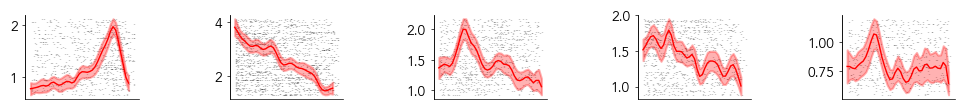

In [23]:
grid = make_grid(3, 5, wspace=.8, hspace=.8, figsize=(12, 5),
                 )

plt.rcParams.update(PLOT_PARAMS)

ax = get_grid_subplot(grid, 0, 0)
plot_raster_with_tuning_curve(sorted_anova,1,ax=ax,raster_color='black',curve_color='red')

ax = get_grid_subplot(grid, 0, 1)
plot_raster_with_tuning_curve(sorted_anova, 0,raster_color='black',curve_color='red',ax=ax)


ax = get_grid_subplot(grid, 0, 2)
plot_raster_with_tuning_curve(sorted_anova, 20,raster_color='black',curve_color='red',ax=ax)

ax = get_grid_subplot(grid, 0, 3)
plot_raster_with_tuning_curve(sorted_anova, 50,raster_color='black',curve_color='red',ax=ax)

ax = get_grid_subplot(grid, 0, 4)
plot_raster_with_tuning_curve(sorted_anova, 200,raster_color='black',curve_color='red',ax=ax)


# Apply thin axis lines to all axes in the figure
for ax in plt.gcf().get_axes():
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.tick_params(width=0.5, length=2.0)  # Make sure all tick marks are smaller


save_figure('Human_Example_Neurons.pdf', file_path='/Users/weijiazhang/Plots/PLDM/Human')